Classification model

3 states: Soft, Hard, Human

Resting will be subtracted from each to account for baseline brain wave differences between samples

# Manipulating Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
file_path = 'Dataset\Sample 1\mindMonitor_2024-11-14--12-09-23-Resting\mindMonitor_2024-11-14--12-09-23.csv'

dataset = pd.read_csv(file_path, header=0)
dataset.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2024-11-14 12:09:23.832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected Muse-C431
1,2024-11-14 12:09:24.833,0.680634,0.0,0.0,0.352584,0.655136,0.0,0.0,0.704461,1.508479,...,5.345917,-5.435638,-0.097198,1.0,1.0,4.0,1.0,1.0,35.0,NaN
2,2024-11-14 12:09:25.833,0.356767,0.0,0.0,0.177184,0.721911,0.0,0.0,0.638689,1.473120,...,5.256195,-5.308533,0.134583,1.0,1.0,4.0,1.0,1.0,35.0,NaN
3,2024-11-14 12:09:26.837,0.566941,0.0,0.0,0.272231,0.370174,0.0,0.0,0.475671,1.006649,...,5.031891,-5.540314,-0.373840,1.0,1.0,2.0,1.0,1.0,35.0,NaN
4,2024-11-14 12:09:27.836,0.385465,0.0,0.0,0.293424,0.245446,0.0,0.0,0.292283,1.156194,...,4.732819,-5.024414,0.186920,1.0,1.0,2.0,1.0,1.0,35.0,NaN


In [3]:
print(dataset.columns)

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8',
       'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')


Only want to keep the Delta, Theta, Alpha, Gamma, and RAW_TP features, so we can drop the other ones. HSI is related to heart rate, which can be informative so it will be kept for now.

In [4]:
dataset.drop(columns=['TimeStamp','AUX_RIGHT','Accelerometer_X','Accelerometer_Y','Accelerometer_Z',
                      'Gyro_X','Gyro_Y','Gyro_Z','HeadBandOn','Battery','Elements'], inplace=True)

In [5]:
dataset.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.680634,0.0,0.0,0.352584,0.655136,0.0,0.0,0.704461,1.508479,0.0,...,0.0,0.513448,1255.531136,451.684982,660.805861,723.663004,1.0,4.0,1.0,1.0
2,0.356767,0.0,0.0,0.177184,0.721911,0.0,0.0,0.638689,1.473120,0.0,...,0.0,0.670204,1002.893773,382.380952,656.373626,783.699634,1.0,4.0,1.0,1.0
3,0.566941,0.0,0.0,0.272231,0.370174,0.0,0.0,0.475671,1.006649,0.0,...,0.0,0.688654,1076.630037,592.710623,732.124542,771.208791,1.0,2.0,1.0,1.0
4,0.385465,0.0,0.0,0.293424,0.245446,0.0,0.0,0.292283,1.156194,0.0,...,0.0,0.581090,1101.208791,354.578755,656.373626,732.930403,1.0,2.0,1.0,1.0


In [6]:
dataset.drop(index=0, inplace=True) #first row is dropped because now data is recorded when the EEG first starts

In [7]:
dataset.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10
1,0.680634,0.0,0.0,0.352584,0.655136,0.0,0.0,0.704461,1.508479,0.0,...,0.0,0.513448,1255.531136,451.684982,660.805861,723.663004,1.0,4.0,1.0,1.0
2,0.356767,0.0,0.0,0.177184,0.721911,0.0,0.0,0.638689,1.473120,0.0,...,0.0,0.670204,1002.893773,382.380952,656.373626,783.699634,1.0,4.0,1.0,1.0
3,0.566941,0.0,0.0,0.272231,0.370174,0.0,0.0,0.475671,1.006649,0.0,...,0.0,0.688654,1076.630037,592.710623,732.124542,771.208791,1.0,2.0,1.0,1.0
4,0.385465,0.0,0.0,0.293424,0.245446,0.0,0.0,0.292283,1.156194,0.0,...,0.0,0.581090,1101.208791,354.578755,656.373626,732.930403,1.0,2.0,1.0,1.0
5,0.728159,0.0,0.0,0.266954,0.380731,0.0,0.0,0.583113,1.204686,0.0,...,0.0,0.617748,667.252747,396.483516,671.282051,784.505495,1.0,4.0,1.0,1.0


The above dataset represents the relevant features of the resting state of one sample. To make sense of the rest of our dataset, we will need to take an average for each of the states, and per sample, take a subtraction of the resting state to get a per sample normalized dataset.

In [8]:
dataset = pd.DataFrame(dataset.mean(axis=0)).transpose()

In [9]:
dataset.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10
0,0.657999,0.0,0.0,0.407413,0.542641,0.0,0.0,0.476937,1.223917,0.0,...,0.0,0.64425,932.632784,407.614469,667.303114,758.315018,1.0,3.0,1.0,1.0


In [10]:
def drop_unrelated_columns_and_rows_then_average(df):
    df.drop(columns=['TimeStamp','AUX_RIGHT','Accelerometer_X','Accelerometer_Y','Accelerometer_Z',
                             'Gyro_X','Gyro_Y','Gyro_Z','HeadBandOn','Battery','Elements'], inplace=True)
    df.drop(index=0, inplace=True) # first row is dropped because now data is recorded when the EEG first starts
    df = pd.DataFrame(df.mean(axis=0)).transpose() # average over sampling duration
    return df

In [11]:
file_path = 'Dataset\Sample 1\mindMonitor_2024-11-14--12-09-23-Resting\mindMonitor_2024-11-14--12-09-23.csv'

datasetTEST = pd.read_csv(file_path, header=0)
datasetTEST = drop_unrelated_columns_and_rows_then_average(datasetTEST)
datasetTEST.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10
0,0.657999,0.0,0.0,0.407413,0.542641,0.0,0.0,0.476937,1.223917,0.0,...,0.0,0.64425,932.632784,407.614469,667.303114,758.315018,1.0,3.0,1.0,1.0


In [12]:
import pandas as pd

# Initialize number of samples
n = 9

# Initialize an empty dictionary
resting_data_dict = {}

# Loop over numbers 1 to 9 to add DataFrames to the dictionary with keys "Sample X"
for i in range(1, n+1):
    # Create a one-row DataFrame (example with random values or calculated values)
    data = {'A': [i], 'B': [i * 2], 'C': [i * 3]}  # Sample data for illustration
    df = pd.DataFrame(data)
    
    # Dynamically add the DataFrame to the dictionary with the key "Sample X"
    resting_data_dict[f"Sample {i}"] = df

In [13]:
import os

# Root folder where the 'Sample X' subfolders are located
root_directory = 'Dataset'
i=0

# Loop through 'Sample 1' to 'Sample 9' folders
for sample_folder in os.listdir(root_directory):
    sample_folder_path = os.path.join(root_directory, sample_folder)
    
    # Check if it's a directory (only look at directories)
    if os.path.isdir(sample_folder_path):
        # List subfolders inside the current 'Sample X' folder
        subfolders = [f for f in os.listdir(sample_folder_path) if os.path.isdir(os.path.join(sample_folder_path, f))]
        
        # Iterate over the subfolders and check for the word "resting" in their name
        for subfolder in subfolders:
            if 'resting' in subfolder.lower():  # Case-insensitive check for "resting"
                resting_subfolder_path = os.path.join(sample_folder_path, subfolder)
                
                # Check if the subfolder contains a .csv file
                for file in os.listdir(resting_subfolder_path):
                    if file.endswith('.csv'):
                        csv_file_path = os.path.join(resting_subfolder_path, file)
                        print(f"Found CSV file: {csv_file_path}")
                        i+=1
                        key = "Sample "+str(i)
                        resting_dataset = pd.read_csv(csv_file_path, header=0)
                        resting_dataset = drop_unrelated_columns_and_rows_then_average(resting_dataset)
                        resting_data_dict[key] = resting_dataset

Found CSV file: Dataset\Sample 1\mindMonitor_2024-11-14--12-09-23-Resting\mindMonitor_2024-11-14--12-09-23.csv
Found CSV file: Dataset\Sample 2\mindMonitor_2024-11-14--12-13-15-Resting\mindMonitor_2024-11-14--12-13-15.csv
Found CSV file: Dataset\Sample 3\mindMonitor_2024-11-14--12-15-44-Resting\mindMonitor_2024-11-14--12-15-44.csv
Found CSV file: Dataset\Sample 4\mindMonitor_2024-11-14--12-19-11-Resting\mindMonitor_2024-11-14--12-19-11.csv
Found CSV file: Dataset\Sample 5\mindMonitor_2024-11-15--11-27-22-Resting\mindMonitor_2024-11-15--11-27-22.csv
Found CSV file: Dataset\Sample 6\mindMonitor_2024-11-15--11-30-43-Resting\mindMonitor_2024-11-15--11-30-43.csv
Found CSV file: Dataset\Sample 7\mindMonitor_2024-11-20--10-51-14-Resting\mindMonitor_2024-11-20--10-51-14.csv
Found CSV file: Dataset\Sample 8\mindMonitor_2024-11-21--13-58-05-Resting\mindMonitor_2024-11-21--13-58-05.csv
Found CSV file: Dataset\Sample 9\mindMonitor_2024-11-22--14-01-02-Resting\mindMonitor_2024-11-22--14-01-02.csv


In [14]:
# Print the dictionary to see the added DataFrames
for key, value in resting_data_dict.items():
    print(f"{key}:\n{value}\n")

Sample 1:
   Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  \
0   0.657999        0.0        0.0    0.407413   0.542641        0.0   

   Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF7  ...  Gamma_AF8  Gamma_TP10  \
0        0.0    0.476937   1.223917        0.0  ...        0.0     0.64425   

      RAW_TP9     RAW_AF7     RAW_AF8    RAW_TP10  HSI_TP9  HSI_AF7  HSI_AF8  \
0  932.632784  407.614469  667.303114  758.315018      1.0      3.0      1.0   

   HSI_TP10  
0       1.0  

[1 rows x 28 columns]

Sample 2:
   Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  \
0   0.926054   0.687187        0.0    0.676787   0.467144   0.343722   

   Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF7  ...  Gamma_AF8  Gamma_TP10  \
0        0.0    0.476606   0.908272   0.281922  ...        0.0    0.649004   

      RAW_TP9     RAW_AF7     RAW_AF8    RAW_TP10  HSI_TP9  HSI_AF7  HSI_AF8  \
0  859.450549  732.225275  648.768315  722.303114      4.0      4.0      2.0   

  

We now have all our resting samples in a dictionary, which we can then subtract from our soft, hard, and hand, data for each respective sample. We'll create a generic dataframe and then append our values as well as a classification at the end for our last column

In [15]:
import os

# Root folder where the 'Sample X' subfolders are located
root_directory = 'Dataset'
i=0

# Loop through 'Sample 1' to 'Sample 9' folders
for sample_folder in os.listdir(root_directory):
    sample_folder_path = os.path.join(root_directory, sample_folder)
    
    # Check if it's a directory (only look at directories)
    if os.path.isdir(sample_folder_path):
        # List subfolders inside the current 'Sample X' folder
        subfolders = [f for f in os.listdir(sample_folder_path) if os.path.isdir(os.path.join(sample_folder_path, f))]
        
        # Iterate over the subfolders and check for the word "resting" in their name
        for subfolder in subfolders:
            if 'resting' in subfolder.lower():  # Case-insensitive check for "resting"
                resting_subfolder_path = os.path.join(sample_folder_path, subfolder)
                
                # Check if the subfolder contains a .csv file
                for file in os.listdir(resting_subfolder_path):
                    if file.endswith('.csv'):
                        csv_file_path = os.path.join(resting_subfolder_path, file)
                        print(f"Found CSV file: {csv_file_path}")
                        i+=1
                        key = "Sample "+str(i)
                        resting_dataset = pd.read_csv(csv_file_path, header=0)
                        resting_dataset = drop_unrelated_columns_and_rows_then_average(resting_dataset)
                        resting_data_dict[key] = resting_dataset

Found CSV file: Dataset\Sample 1\mindMonitor_2024-11-14--12-09-23-Resting\mindMonitor_2024-11-14--12-09-23.csv
Found CSV file: Dataset\Sample 2\mindMonitor_2024-11-14--12-13-15-Resting\mindMonitor_2024-11-14--12-13-15.csv
Found CSV file: Dataset\Sample 3\mindMonitor_2024-11-14--12-15-44-Resting\mindMonitor_2024-11-14--12-15-44.csv
Found CSV file: Dataset\Sample 4\mindMonitor_2024-11-14--12-19-11-Resting\mindMonitor_2024-11-14--12-19-11.csv
Found CSV file: Dataset\Sample 5\mindMonitor_2024-11-15--11-27-22-Resting\mindMonitor_2024-11-15--11-27-22.csv
Found CSV file: Dataset\Sample 6\mindMonitor_2024-11-15--11-30-43-Resting\mindMonitor_2024-11-15--11-30-43.csv
Found CSV file: Dataset\Sample 7\mindMonitor_2024-11-20--10-51-14-Resting\mindMonitor_2024-11-20--10-51-14.csv
Found CSV file: Dataset\Sample 8\mindMonitor_2024-11-21--13-58-05-Resting\mindMonitor_2024-11-21--13-58-05.csv
Found CSV file: Dataset\Sample 9\mindMonitor_2024-11-22--14-01-02-Resting\mindMonitor_2024-11-22--14-01-02.csv


In [16]:
dataset.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10
0,0.657999,0.0,0.0,0.407413,0.542641,0.0,0.0,0.476937,1.223917,0.0,...,0.0,0.64425,932.632784,407.614469,667.303114,758.315018,1.0,3.0,1.0,1.0


In [17]:
ready_dataset = pd.DataFrame(dataset.drop(index=0, inplace=False))

In [18]:
ready_dataset['State'] = 0

In [19]:
ready_dataset.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,State


We now have an empty dataframe with the headers we want

In [20]:
import os

# Root folder where the 'Sample X' subfolders are located
root_directory = 'Dataset'
state = ''
i=0
ready_dataset.drop(ready_dataset.index, inplace=True)

# Loop through 'Sample 1' to 'Sample 9' folders
for sample_folder in os.listdir(root_directory):
    sample_folder_path = os.path.join(root_directory, sample_folder)
    
    # Check if it's a directory (only look at directories)
    if os.path.isdir(sample_folder_path):
        # List subfolders inside the current 'Sample X' folder
        subfolders = [f for f in os.listdir(sample_folder_path) if os.path.isdir(os.path.join(sample_folder_path, f))]
        
        # Assign current Sample Number
        i+=1
        key = "Sample "+str(i)
        
        # Iterate over the subfolders and check for the word "resting" in their name
        for subfolder in subfolders:
            # Check if the subfolder contains a .csv file
                state_subfolder_path = os.path.join(sample_folder_path, subfolder)
                for file in os.listdir(state_subfolder_path):
                    if file.endswith('.csv') and not ('resting' in subfolder.lower()):
                        csv_file_path = os.path.join(state_subfolder_path, file)
                        print(f"Found CSV file: {csv_file_path}")
                        
                        state_dataset = pd.read_csv(csv_file_path, header=0)
                        state_dataset = drop_unrelated_columns_and_rows_then_average(state_dataset)
                        state_dataset = state_dataset-resting_data_dict[key] # subtract resting average from state average
                        
                        if 'hard' in subfolder.lower():
                                state = 'hard'
                        if 'soft' in subfolder.lower():
                                state = 'soft'
                        if 'hand' in subfolder.lower():
                                state = 'human'
                        
                        state_dataset['State'] = state
                        ready_dataset = pd.concat([ready_dataset, state_dataset], ignore_index=True) 

Found CSV file: Dataset\Sample 1\mindMonitor_2024-11-14--12-09-43-Hard\mindMonitor_2024-11-14--12-09-43.csv
Found CSV file: Dataset\Sample 1\mindMonitor_2024-11-14--12-10-00- Soft\mindMonitor_2024-11-14--12-10-00.csv
Found CSV file: Dataset\Sample 1\mindMonitor_2024-11-14--12-10-20-Hand\mindMonitor_2024-11-14--12-10-20.csv
Found CSV file: Dataset\Sample 2\mindMonitor_2024-11-14--12-13-31-Hard\mindMonitor_2024-11-14--12-13-31.csv
Found CSV file: Dataset\Sample 2\mindMonitor_2024-11-14--12-13-52-Soft\mindMonitor_2024-11-14--12-13-52.csv
Found CSV file: Dataset\Sample 2\mindMonitor_2024-11-14--12-14-13-Hand\mindMonitor_2024-11-14--12-14-13.csv
Found CSV file: Dataset\Sample 3\mindMonitor_2024-11-14--12-16-02-Hard\mindMonitor_2024-11-14--12-16-02.csv
Found CSV file: Dataset\Sample 3\mindMonitor_2024-11-14--12-16-27-Soft\mindMonitor_2024-11-14--12-16-27.csv
Found CSV file: Dataset\Sample 3\mindMonitor_2024-11-14--12-16-45-Hand\mindMonitor_2024-11-14--12-16-45.csv
Found CSV file: Dataset\Sam

In [21]:
print(ready_dataset)

    Delta_TP9     Delta_AF7  Delta_AF8    Delta_TP10  Theta_TP9     Theta_AF7  \
0   -0.410989  0.000000e+00   0.000000 -1.535975e-01  -0.189234  0.000000e+00   
1    0.056737  0.000000e+00   0.000000  5.534699e-02   0.027642  0.000000e+00   
2   -0.002786  0.000000e+00   0.000000  4.799671e-02  -0.104260  0.000000e+00   
3    0.282884  0.000000e+00   0.000000  5.861571e-01   0.492779  5.551115e-17   
4    0.282884  0.000000e+00   0.000000  5.861571e-01   0.492779  0.000000e+00   
5    0.282884  1.110223e-16   0.000000  5.861571e-01   0.492779  5.551115e-17   
6    0.384098  0.000000e+00   0.000000  4.584426e-01   0.415908  0.000000e+00   
7    0.531709  0.000000e+00   0.000000  7.691953e-01   0.413968  0.000000e+00   
8    0.681517  0.000000e+00   0.000000  6.772133e-01   0.362724  0.000000e+00   
9    0.000000  0.000000e+00   0.000000  0.000000e+00   0.000000  0.000000e+00   
10   0.000000  0.000000e+00   0.000000  0.000000e+00   0.000000  0.000000e+00   
11   0.000000  0.000000e+00 

In [22]:
ready_dataset.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,State
0,-0.410989,0.0,0.0,-0.153598,-0.189234,0.000000e+00,0.0,-0.277538,-0.341913,0.000000e+00,...,-0.113005,175.604904,-3.520045,10.515364,9.401709,0.000000,-0.111111,0.000,0.000000,hard
1,0.056737,0.0,0.0,0.055347,0.027642,0.000000e+00,0.0,-0.113992,-0.359876,0.000000e+00,...,-0.194802,54.697802,-48.351648,-41.955128,-8.360806,0.000000,0.750000,0.125,0.000000,soft
2,-0.002786,0.0,0.0,0.047997,-0.104260,0.000000e+00,0.0,-0.091089,-0.065052,0.000000e+00,...,-0.089942,176.684982,294.592491,196.630037,203.530220,0.000000,1.000000,0.000,0.000000,human
3,0.282884,0.0,0.0,0.586157,0.492779,5.551115e-17,0.0,0.781950,0.069014,0.000000e+00,...,-0.047911,-111.253561,-211.997354,-83.859890,-5.579467,-0.222222,0.000000,0.000,-0.222222,hard
4,0.282884,0.0,0.0,0.586157,0.492779,0.000000e+00,0.0,0.781950,0.069014,5.551115e-17,...,-0.047911,-109.798535,-245.001832,-73.464286,81.059524,-0.200000,0.000000,0.000,-0.200000,soft


# Conventional Data Preprocessing

## Importing data

In [23]:
X = ready_dataset.iloc[:, :-1].values
y = ready_dataset.iloc[:, -1].values

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Display the mapping of the original labels to their numerical values
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapping: ", label_mapping)

Label Mapping:  {'hard': 0, 'human': 1, 'soft': 2}


## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting into Training and Test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 34)

# Fitting to Models

### Importing Evaluation and Model Libraries

In [27]:
# Importing evaluation libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importing model libraries
from sklearn.linear_model import LogisticRegression

### Define Plot Confusion Matrix Function

In [28]:
from sklearn.metrics import confusion_matrix

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

### Build ANN

In [29]:
import tensorflow as tf
import keras

In [30]:
tf.__version__

'2.18.0'

In [31]:
keras.__version__

'3.6.0'

In [32]:
from keras.optimizers import Adam

In [33]:
Muse2TouchANN=tf.keras.models.Sequential()

Muse2TouchANN.add(tf.keras.layers.Dense(28,activation='relu'))
Muse2TouchANN.add(tf.keras.layers.Dense(15,activation='relu'))
Muse2TouchANN.add(tf.keras.layers.Dense(3,activation='softmax'))

Muse2TouchANN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

h = Muse2TouchANN.fit(X_train, y_train, batch_size = 1, epochs = 10, validation_split=0.2, verbose=0)

### Fit ANN and Plot ANN Learning Curves Function

In [34]:
def fit_ANN_and_plot_LC(model):
    history = model.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 300, verbose=0)

    fig, ax = plt.subplots(figsize=(8, 5))  # Create a single plot

    # Plot the loss for the single model
    ax.plot(history.history['loss'], label='Train')
    ax.plot(history.history['val_loss'], label='Validation')

    # Set titles and labels
    ax.set_title("Model Loss Function")
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

    # Add a legend
    ax.legend(loc="upper left")

    # Show the plot
    plt.show()

### Fitting Models

Logistic Regression:
  Training Accuracy: 90.48%
  Test Accuracy: 16.67%



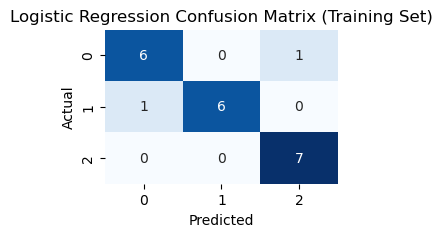

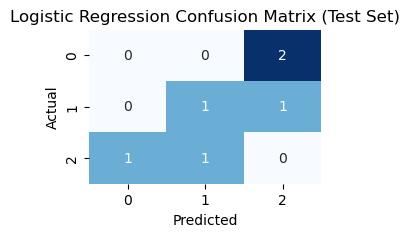

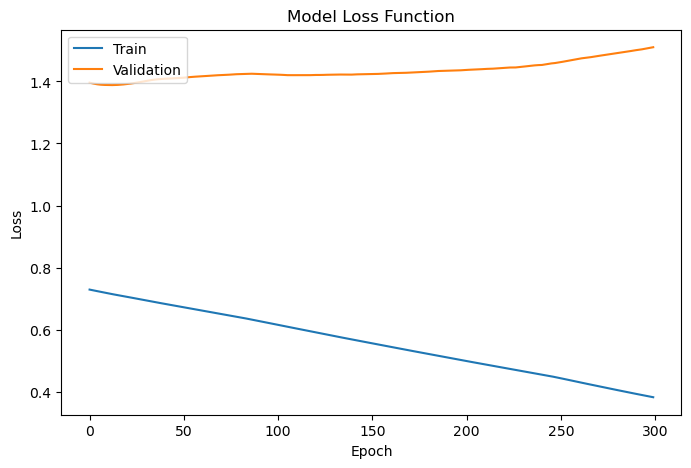

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
ANN:
  Training Accuracy: 85.71%
  Test Accuracy: 0.00%



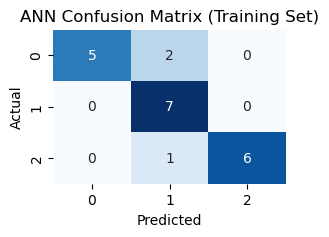

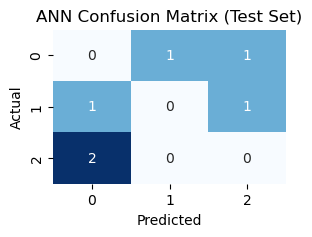

,Train Accuracy,Test Accuracy
Logistic Regression,90.476190,16.666667
ANN,85.714286,0.000000


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression# Initialize the classifiers
models = { 
    "Logistic Regression": LogisticRegression(),
    "ANN": Muse2TouchANN
}

# Dictionary to store accuracy results
accuracy_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    if model_name == "ANN":
            # Fit the ANN model and plot learning curves
            fit_ANN_and_plot_LC(model)
            
            # Make predictions
            y_train_pred = np.argmax(model.predict(X_train), axis=-1)
            y_test_pred = np.argmax(model.predict(X_test), axis=-1)
    else:
            # Fit the other models
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)    
    
    # Calculate the training and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results in the dictionary
    accuracy_results[model_name] = {
        "Train Accuracy": train_accuracy * 100,
        "Test Accuracy": test_accuracy * 100
    }
    
    # Print the accuracy for each model
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"  Test Accuracy: {test_accuracy * 100:.2f}%\n")
    
    # Plot confusion matrix for training data
    plot_confusion_matrix(y_train, y_train_pred, model_name+ ' '+'Confusion Matrix (Training Set)')

    # Plot confusion matrix for test data
    plot_confusion_matrix(y_test, y_test_pred, model_name+ ' '+'Confusion Matrix (Test Set)')

# Display accuracy results in a table
import pandas as pd
accuracy_df = pd.DataFrame(accuracy_results).T

accuracy_df

In [37]:
print(y_train)

[2 1 1 0 0 1 2 2 1 0 1 0 1 1 0 2 2 0 0 2 2]


In [38]:
print(y_train_pred)

[2 1 1 0 0 1 2 2 1 0 1 0 1 1 0 2 2 1 1 2 1]


In [39]:
print(y_test)

[2 0 1 1 2 0]


In [40]:
print(y_test_pred)

[0 2 2 0 0 1]
